In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('data/cheapcleaned.csv')

In [4]:
df.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,56,346033,5,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,28,96226,9,0,0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,33,251120,13,7688,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,26,178140,13,0,0,45,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,40,56795,14,14084,0,55,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
X = df.drop(columns = 'wage')
y = df['wage']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [14]:
rf = RandomForestClassifier()

In [23]:
params = {
    'n_estimators': (100, 200, 300),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
gs = GridSearchCV(rf, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8456216336392771


{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [25]:
y_pred_train = gs.predict(X_train)

In [26]:
y_pred_test = gs.predict(X_test)

In [38]:
f1_train = metrics.f1_score(y_train, y_pred = gs.predict(X_train))
f1_test = metrics.f1_score(y_true = y_test, y_pred = gs.predict(X_test))

In [28]:
f1_train, f1_test

(1.0, 0.6459802538787024)

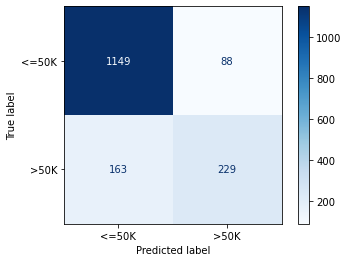

In [36]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues',
                     display_labels=['<=50K', '>50K']);